Final Tutorial

In [88]:
import os
import pandas as pd
import requests
from bs4 import BeautifulSoup
import spotipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Use xml files to scrape from spotify charts
for each track show their streams per day, maybe as an array or another dataframe
from there spotipy api can be used to observe the details of these songs

In [89]:
# Collect links from spotify charts top 200 streams per day
ref_str = "https://spotifycharts.com/regional/global/daily/"
ref_arr = []

# gets every day from janurary 2017 to October 2020

# for year in range(2017, 2021):
for year in range(2017, 2018):
    date = ""
    
    endingMonth = 12
    if year == 2020:
        endingMonth = 10
        
    # for month in range (1, endingMonth + 1):
    for month in range (1, 13):
       
        dayCount = -1

        #gets proper day count per month
        thirtyDayCountMonths = [4, 6, 9, 11]
        if month == 2:
            dayCount = 29
        elif month in thirtyDayCountMonths:
            dayCount = 30
        else:
            dayCount = 31

        if int(month) < 10:
            month = "0" + str(month)
        #for day in range (1, 16):
           
        #    if int(day) < 10:
        #        day = "0" + str(day)

        date = str(year) + "-" + str(month) + "-" + "01" + "/download"
        date = ref_str + date
        ref_arr.append(date)

ref_arr

['https://spotifycharts.com/regional/global/daily/2017-01-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-02-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-03-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-04-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-05-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-06-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-07-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-08-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-09-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-10-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-11-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-12-01/download']

In [212]:
#Loop downloading and appending of dataframes 

df = pd.DataFrame(columns =['position', 'track_name', 'artist', 'streams', 'url', 'date'] )
#make dir to save to
path = "sheets"
try:
    os.mkdir(path)
except OSError:
    print ("Folder already exists")

for i in ref_arr:
    r = requests.get(i, allow_redirects = True)
    #String manipulation to read from the correct csv files
    date = i[48:58]
    #print(date)
    fileName = "regional-global-daily-" + date + ".csv"
    #print(fileName)
    open(fileName, "wb").write(r.content)

    #os.rename(fileName, "sheets/" + fileName)  

    df_new = pd.read_csv(fileName)
    df_new.columns= ['position', 'track_name', 'artist', 'streams', 'url']
    df_new['date'] = date
    
    df_new = df_new.iloc[1:] #deletes junk row from csv conversion
    df = df.append(df_new)


df = df.reset_index() # Sets index back to being the regular 0-based index. This is really helpful when trying to add more to the dataframe later, because otherwise there are lots of duplicate indices
#df.drop(['position'], axis=1, inplace=True) #delete position row since rank alraedy has this information

Folder already exists


In [213]:
df

index position                               track_name  \
0         1        1                                  Starboy   
1         2        2                                   Closer   
2         3        3                          Let Me Love You   
3         4        4  Rockabye (feat. Sean Paul & Anne-Marie)   
4         5        5                                One Dance   
...     ...      ...                                      ...   
2395    196      196  Rockabye (feat. Sean Paul & Anne-Marie)   
2396    197      197           Rake It Up (feat. Nicki Minaj)   
2397    198      198       New Freezer (feat. Kendrick Lamar)   
2398    199      199                                All Night   
2399    200      200                                      113   

                artist  streams  \
0           The Weeknd  3135625   
1     The Chainsmokers  3015525   
2             DJ Snake  2545384   
3         Clean Bandit  2356604   
4                Drake  2259887   
...                ...      ...   
2395      Clean Bandit   552118   
2396          Yo Gotti   551576   
2397      Rich The Kid   550167   
2398        Steve Aoki   548039   
2399             Booba   546878   

                                                    url        date  
0     https://open.spotify.com/track/5aAx2yezTd8zXrk...  2017-01-01  
1     https://open.spotify.com/track/7BKLCZ1jbUBVqRi...  2017-01-01  
2     https://open.spotify.com/track/4pdPtRcBmOSQDlJ...  2017-01-01  
3     https://open.spotify.com/track/5knuzwU65gJK7IF...  2017-01-01  
4     https://open.spotify.com/track/1xznGGDReH1oQq0...  2017-01-01  
...                                                 ...         ...  
2395  https://open.spotify.com/track/5knuzwU65gJK7IF...  2017-12-01  
2396  https://open.spotify.com/track/4knL4iPxPOZjQzT...  2017-12-01  
2397  https://open.spotify.com/track/4pYZLpX23Vx8rwD...  2017-12-01  
2398  https://open.spotify.com/track/5mAxA6Q1SIym6dP...  2017-12-01  
2399  https://open.spotify.com/track/6xqAP7kpdgCy8lE...  2017-12-01  

[2400 rows x 7 columns]

In [92]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials


SPOTIPY_CLIENT_ID="ea1a162fbc6f413990542b76ab82a168"
SPOTIPY_CLIENT_SECRET="a09882042ce54f158fdd2b6baaf2b26d"
SPOTIPY_CLIENT_REDIRECT="http://www.cs.umd.edu/class/fall2020/cmsc320-0201/"

scope = "user-library-read"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope, client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET, redirect_uri=SPOTIPY_CLIENT_REDIRECT))

In [93]:
#gets artist genres and artist ids for each artist in dataframe and puts them in arrays
#artist_genres = []
#artist_ids = []

#for index, row in df.iterrows():
#    artist = row['artist']
    #print(index)
    #print(artist)
#    trackArtistWithoutSpaces = '+'.join(artist.split())
#    result = sp.search(trackArtistWithoutSpaces)
#    track = result['tracks']['items'][0]
#    artist_id = track["artists"][0]["id"]
    #print(artist_id)
    #print(track)
#    artist_ids.append(artist_id)
#    artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
#    artist_genres.append(artist["genres"])
    #print(artist["genres"])



In [94]:
#print(df["artist_genres"])

#creates new column in dataframe based on genre filter within filter func
#def filt_func(genre_list):
#    genre = ['pop','rap','edm','rock','indie']
#    result = list(filter(lambda x: x in genre, genre_list))
#    return "other" if len(result) == 0 else result[0]
    #print(result)
#df['genre'] = df['artist_genres'].apply(lambda x: filt_func(x))
#df['streams'] = df['streams'].apply(lambda x: int(x))

In [185]:
# This cell was to help understand how to get the track_id and artist_id from a search query
#trackName = df.iloc[0].at['track_name']
#trackNameWithoutSpaces = '+'.join(trackName.split())
#searchQuery = sp.search(trackNameWithoutSpaces, 1, 0)
#track_object = searchQuery['tracks']['items'][0]
#artist_object = track_object['artists'][0]
#artist_id = artist_object['id']
#track_id = track_object['id']
#audiofeatures = sp.audio_features(track_id)
#print(track_id)
#print(artist_id)
#print(audiofeatures[0]['danceability'])
#print(trackNameWithoutSpaces)

In [186]:
artist_id_list = []
track_id_list = []
audioFeaturesDf = pd.DataFrame()
# This gets the artist id and the track id (which is included in the "audio_features" search we make)
# Does this by making one search through the api and gets the ids from the information returned
for index, row in df.iterrows():
    trackName = row['track_name']
    track_id = ""
    artist_id = ""
    print(trackName)
    # We need to check if our track_name received was a nan value. Idk how these got in here, but there are nans
    if(type(trackName) == str):
        trackNameWithoutSpaces = '+'.join(trackName.split())
        searchQuery = sp.search(trackNameWithoutSpaces, 1, 0)
        if (len(searchQuery['tracks']['items']) != 0):
            track_object = searchQuery['tracks']['items'][0]
            artist_object = track_object['artists'][0] if type(track_object['artists']) is list else track_object['artists']
            artist_id = artist_object['id']
            track_id = track_object['id']
            artist_id_list.append(artist_id)
            track_id_list.append(track_id)
        # If our query returned nothing then append a nan in the place of artist and track for this entry
        else:
            artist_id_list.append(np.nan)
            track_id_list.append(np.nan)
        #print(trackItem)
    # If we had stored a nan, then just plan to append a nan in this position
    else:
        artist_id_list.append(np.nan)
        track_id_list.append(np.nan)
    audiofeatures = {'duration_ms' : np.nan, 'key' : np.nan, 'mode' : np.nan, 'time_signature' : np.nan, 'acousticness' : np.nan, 'danceability' : np.nan, 'energy' : np.nan, 'instrumentalness' : np.nan, 'liveness' : np.nan, 'loudness' : np.nan, 'speechiness' : np.nan, 'valence' : np.nan, 'tempo' : np.nan, 'id' : np.nan, 'uri' : np.nan, 'track_href' : np.nan, 'analysis_url' : np.nan, 'type' : np.nan, }
    #print(audiofeatures)
    # If we successfully found a track when we did our seach, then get the audio features for that
    if (track_id != ""):
        audiofeatures = sp.audio_features(track_id)[0]
    #print(track_id)
    #print(audiofeatures)
    audioFeaturesDf = audioFeaturesDf.append(audiofeatures, ignore_index=True)
    
audioFeaturesDf.head()

& Chacal)
Craving You
The Scientist
Mi Gente
Despacito - Remix
Wild Thoughts (feat. Rihanna & Bryson Tiller)
Unforgettable
Feels (feat. Pharrell Williams, Katy Perry & Big Sean)
2U (feat. Justin Bieber)
I'm the One (feat. Justin Bieber, Quavo, Chance the Rapper & Lil Wayne)
Shape of You
Attention
Strip That Down
Thunder
Mama
Sorry Not Sorry
There's Nothing Holdin' Me Back
More Than You Know
XO TOUR Llif3
Fetish (feat. Gucci Mane)
New Rules
There for You
HUMBLE.
Swalla (feat. Nicki Minaj & Ty Dolla $ign)
Something Just Like This
Back to You (feat. Bebe Rexha & Digital Farm Animals)
Congratulations
Believer
Felices los 4
Despacito (Featuring Daddy Yankee)
Me Rehúso
Pretty Girl - Cheat Codes X CADE Remix
Your Song
Slow Hands
Know No Better (feat. Travis Scott, Camila Cabello & Quavo)
Signs
I Like Me Better
Glorious (feat. Skylar Grey)
Crying in the Club
Bad Liar
Symphony (feat. Zara Larsson)
Bank Account
Slide (feat. Frank Ocean & Migos)
That's What I Like
Stay (with Alessia Cara)
BUTTERF

acousticness                                       analysis_url  \
0       0.14100  https://api.spotify.com/v1/audio-analysis/7MXV...   
1       0.41400  https://api.spotify.com/v1/audio-analysis/7BKL...   
2       0.23500  https://api.spotify.com/v1/audio-analysis/3ibK...   
3       0.40600  https://api.spotify.com/v1/audio-analysis/5knu...   
4       0.00776  https://api.spotify.com/v1/audio-analysis/1zi7...   

   danceability  duration_ms  energy                      id  \
0         0.679     230453.0   0.587  7MXVkk9YMctZqd1Srtv4MB   
1         0.748     244960.0   0.524  7BKLCZ1jbUBVqRi2FVlTVw   
2         0.656     256733.0   0.578  3ibKnFDaa3GhpPGlOUj7ff   
3         0.720     251088.0   0.763  5knuzwU65gJK7IF5yJsuaW   
4         0.792     173987.0   0.625  1zi7xx7UVEFkmKfv06H8x0   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.000006  7.0     0.137    -7.015   1.0       0.2760  186.003   
1          0.000000  8.0     0.111    -5.599   1.0       0.0338   95.010   
2          0.000000  7.0     0.118    -8.970   0.0       0.0922   94.514   
3          0.000000  9.0     0.180    -4.068   0.0       0.0523  101.965   
4          0.001800  1.0     0.329    -5.609   1.0       0.0536  103.967   

   time_signature                                         track_href  \
0             4.0  https://api.spotify.com/v1/tracks/7MXVkk9YMctZ...   
1             4.0  https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...   
2             4.0  https://api.spotify.com/v1/tracks/3ibKnFDaa3Gh...   
3             4.0  https://api.spotify.com/v1/tracks/5knuzwU65gJK...   
4             4.0  https://api.spotify.com/v1/tracks/1zi7xx7UVEFk...   

             type                                   uri  valence  
0  audio_features  spotify:track:7MXVkk9YMctZqd1Srtv4MB    0.486  
1  audio_features  spotify:track:7BKLCZ1jbUBVqRi2FVlTVw    0.661  
2  audio_features  spotify:track:3ibKnFDaa3GhpPGlOUj7ff    0.556  
3  audio_features  spotify:track:5knuzwU65gJK7IF5yJsuaW    0.742  
4  audio_features  spotify:track:1zi7xx7UVEFkmKfv06H8x0    0.370

In [214]:
audioFeaturesDf['artist_id'] = artist_id_list
audioFeaturesDf.head(205)

acousticness                                       analysis_url  \
0         0.14100  https://api.spotify.com/v1/audio-analysis/7MXV...   
1         0.41400  https://api.spotify.com/v1/audio-analysis/7BKL...   
2         0.23500  https://api.spotify.com/v1/audio-analysis/3ibK...   
3         0.40600  https://api.spotify.com/v1/audio-analysis/5knu...   
4         0.00776  https://api.spotify.com/v1/audio-analysis/1zi7...   
..            ...                                                ...   
200       0.58100  https://api.spotify.com/v1/audio-analysis/7qiZ...   
201       0.07250  https://api.spotify.com/v1/audio-analysis/4irY...   
202       0.05860  https://api.spotify.com/v1/audio-analysis/4s1g...   
203           NaN                                                NaN   
204       0.02320  https://api.spotify.com/v1/audio-analysis/6PCU...   

     danceability  duration_ms  energy                      id  \
0           0.679     230453.0   0.587  7MXVkk9YMctZqd1Srtv4MB   
1           0.748     244960.0   0.524  7BKLCZ1jbUBVqRi2FVlTVw   
2           0.656     256733.0   0.578  3ibKnFDaa3GhpPGlOUj7ff   
3           0.720     251088.0   0.763  5knuzwU65gJK7IF5yJsuaW   
4           0.792     173987.0   0.625  1zi7xx7UVEFkmKfv06H8x0   
..            ...          ...     ...                     ...   
200         0.825     233713.0   0.652  7qiZfU4dY1lWllzX7mPBI3   
201         0.849     111020.0   0.648  4irYeuAi87yyGHcI4h9s0x   
202         0.732     245653.0   0.445  4s1gw3EgOpc9InInSqiMiv   
203           NaN          NaN     NaN                     NaN   
204         0.461     261154.0   0.834  6PCUP3dWmTjcTtXY02oFdT   

     instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0            0.000006  7.0    0.1370    -7.015   1.0       0.2760  186.003   
1            0.000000  8.0    0.1110    -5.599   1.0       0.0338   95.010   
2            0.000000  7.0    0.1180    -8.970   0.0       0.0922   94.514   
3            0.000000  9.0    0.1800    -4.068   0.0       0.0523  101.965   
4            0.001800  1.0    0.3290    -5.609   1.0       0.0536  103.967   
..                ...  ...       ...       ...   ...          ...      ...   
200          0.000000  1.0    0.0931    -3.183   0.0       0.0802   95.977   
201          0.005920  7.0    0.0984    -6.188   1.0       0.0832  106.075   
202          0.000017  0.0    0.2150    -8.403   1.0       0.0529  117.967   
203               NaN  NaN       NaN       NaN   NaN          NaN      NaN   
204          0.000011  2.0    0.1400    -4.868   1.0       0.0989  135.007   

     time_signature                                         track_href  \
0               4.0  https://api.spotify.com/v1/tracks/7MXVkk9YMctZ...   
1               4.0  https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...   
2               4.0  https://api.spotify.com/v1/tracks/3ibKnFDaa3Gh...   
3               4.0  https://api.spotify.com/v1/tracks/5knuzwU65gJK...   
4               4.0  https://api.spotify.com/v1/tracks/1zi7xx7UVEFk...   
..              ...                                                ...   
200             4.0  https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...   
201             4.0  https://api.spotify.com/v1/tracks/4irYeuAi87yy...   
202             4.0  https://api.spotify.com/v1/tracks/4s1gw3EgOpc9...   
203             NaN                                                NaN   
204             4.0  https://api.spotify.com/v1/tracks/6PCUP3dWmTjc...   

               type                                   uri  valence  \
0    audio_features  spotify:track:7MXVkk9YMctZqd1Srtv4MB    0.486   
1    audio_features  spotify:track:7BKLCZ1jbUBVqRi2FVlTVw    0.661   
2    audio_features  spotify:track:3ibKnFDaa3GhpPGlOUj7ff    0.556   
3    audio_features  spotify:track:5knuzwU65gJK7IF5yJsuaW    0.742   
4    audio_features  spotify:track:1zi7xx7UVEFkmKfv06H8x0    0.370   
..              ...                                   ...      ...   
200  audio_features  spotify:tr

In [215]:
audioFeaturesDf
df['duration_ms'] = audioFeaturesDf['duration_ms']
df['acousticness'] = audioFeaturesDf['acousticness']
df['danceability'] = audioFeaturesDf['danceability']
df['energy'] = audioFeaturesDf['energy']
df['instrumentalness'] = audioFeaturesDf['instrumentalness']
df['liveness'] = audioFeaturesDf['liveness']
df['loudness'] = audioFeaturesDf['loudness']
df['speechiness'] = audioFeaturesDf['speechiness']
df['valence'] = audioFeaturesDf['valence']
df['tempo'] = audioFeaturesDf['tempo']
df.head(201)

index position                               track_name  \
0        1        1                                  Starboy   
1        2        2                                   Closer   
2        3        3                          Let Me Love You   
3        4        4  Rockabye (feat. Sean Paul & Anne-Marie)   
4        5        5                                One Dance   
..     ...      ...                                      ...   
196    197      197                                  Oh Lord   
197    198      198            Superstition - Single Version   
198    199      199                                  Secrets   
199    200      200                          Ni**as In Paris   
200      1        1                             Shape of You   

               artist  streams  \
0          The Weeknd  3135625   
1    The Chainsmokers  3015525   
2            DJ Snake  2545384   
3        Clean Bandit  2356604   
4               Drake  2259887   
..                ...      ...   
196         MiC LOWRY   331792   
197     Stevie Wonder   331376   
198        The Weeknd   331233   
199             JAY-Z   325951   
200        Ed Sheeran  7549041   

                                                   url        date  \
0    https://open.spotify.com/track/5aAx2yezTd8zXrk...  2017-01-01   
1    https://open.spotify.com/track/7BKLCZ1jbUBVqRi...  2017-01-01   
2    https://open.spotify.com/track/4pdPtRcBmOSQDlJ...  2017-01-01   
3    https://open.spotify.com/track/5knuzwU65gJK7IF...  2017-01-01   
4    https://open.spotify.com/track/1xznGGDReH1oQq0...  2017-01-01   
..                                                 ...         ...   
196  https://open.spotify.com/track/1sTUEdVO85YU8Ym...  2017-01-01   
197  https://open.spotify.com/track/5lXcSvHRVjQJ3LB...  2017-01-01   
198  https://open.spotify.com/track/3DX4Y0egvc0slLc...  2017-01-01   
199  https://open.spotify.com/track/2KpCpk6HjXXLb7n...  2017-01-01   
200  https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-02-01   

     duration_ms  acousticness  danceability  energy  instrumentalness  \
0       230453.0       0.14100         0.679   0.587          0.000006   
1       244960.0       0.41400         0.748   0.524          0.000000   
2       256733.0       0.23500         0.656   0.578          0.000000   
3       251088.0       0.40600         0.720   0.763          0.000000   
4       173987.0       0.00776         0.792   0.625          0.001800   
..           ...           ...           ...     ...               ...   
196     198253.0       0.40700         0.493   0.738          0.000000   
197     245493.0       0.03800         0.633   0.634          0.006400   
198     224693.0       0.07170         0.516   0.764          0.000000   
199     219333.0       0.12700         0.789   0.858          0.000000   
200     233713.0       0.58100         0.825   0.652          0.000000   

     liveness  loudness  speechiness  valence    tempo  
0      0.1370    -7.015       0.2760    0.486  186.003  
1      0.1110    -5.599       0.0338    0.661   95.010  
2      0.1180    -8.970       0.0922    0.556   94.514  
3      0.1800    -4.068       0.0523    0.742  101.965  
4      0.3290    -5.609       0.0536    0.370  103.967  
..        ...       ...          ...      ...      ...  
196    0.1300    -6.921       0.2620    0.219  176.071  
197    0.0385   -12.115       0.0725    0.872  100.499  
198    0.1150    -6.223       0.0366    0.376  148.021  
199    0.3490    -5.542       0.3110    0.775  140.022  
200    0.0931    -3.183       0.0802    0.931   95.977  

[201 rows x 17 columns]

In [216]:
#visualization
#plotting all the new metrics in our dataframe vs streams
df['streams'] = df['streams'].astype(int)
df['position'] = df['position'].astype(int)
df.loc[df['position'] == 1].head() # Previously this was showing that every 

index  position         track_name      artist  streams  \
0        1         1            Starboy  The Weeknd  3135625   
200      1         1       Shape of You  Ed Sheeran  7549041   
400      1         1       Shape of You  Ed Sheeran  7201132   
600      1         1       Shape of You  Ed Sheeran  6815498   
800      1         1  Despacito - Remix  Luis Fonsi  6360737   

                                                   url        date  \
0    https://open.spotify.com/track/5aAx2yezTd8zXrk...  2017-01-01   
200  https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-02-01   
400  https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-03-01   
600  https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-04-01   
800  https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-05-01   

     duration_ms  acousticness  danceability  energy  instrumentalness  \
0       230453.0         0.141         0.679   0.587          0.000006   
200     233713.0         0.581         0.825   0.652          0.000000   
400     233713.0         0.581         0.825   0.652          0.000000   
600     233713.0         0.581         0.825   0.652          0.000000   
800     228827.0         0.228         0.653   0.816          0.000000   

     liveness  loudness  speechiness  valence    tempo  
0      0.1370    -7.015       0.2760    0.486  186.003  
200    0.0931    -3.183       0.0802    0.931   95.977  
400    0.0931    -3.183       0.0802    0.931   95.977  
600    0.0931    -3.183       0.0802    0.931   95.977  
800    0.0967    -4.353       0.1670    0.816  178.085

Here are the features for the first few songs sorted by streams. We will remove duplicates of songs and maintain the versions with the highest streams

In [342]:
df.sort_values('streams', ascending=False).drop_duplicates(['artist', 'duration_ms', 'acousticness', 'danceability', 'energy'], keep='first').head(10)

index  position                                     track_name  \
200       1         1                                   Shape of You   
1000      1         1                              Despacito - Remix   
2000      1         1                                       rockstar   
1600      1         1                       Look What You Made Me Do   
1001      2         2                                    I'm the One   
1601      2         2                                       Mi Gente   
401       2         2                       Something Just Like This   
1201      2         2  Wild Thoughts (feat. Rihanna & Bryson Tiller)   
402       3         3                It Ain't Me (with Selena Gomez)   
2001      2         2                                         Havana   

                artist   streams  \
200         Ed Sheeran  7.375119   
1000        Luis Fonsi  7.163332   
2000       Post Malone  5.623007   
1600      Taylor Swift  5.420143   
1001         DJ Khaled  5.088986   
1601          J Balvin  4.646598   
401   The Chainsmokers  4.476229   
1201         DJ Khaled  4.453111   
402               Kygo  4.425354   
2001    Camila Cabello  4.336331   

                                                    url        date  \
200   https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-02-01   
1000  https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-06-01   
2000  https://open.spotify.com/track/7wGoVu4Dady5GV0...  2017-11-01   
1600  https://open.spotify.com/track/6uFsE1JgZ20EXyU...  2017-09-01   
1001  https://open.spotify.com/track/72Q0FQQo32KJloi...  2017-06-01   
1601  https://open.spotify.com/track/2rb5MvYT7ZIxbKW...  2017-09-01   
401   https://open.spotify.com/track/6RUKPb4LETWmmr3...  2017-03-01   
1201  https://open.spotify.com/track/1OAh8uOEOvTDqkK...  2017-07-01   
402   https://open.spotify.com/track/3eR23VReFzcdmS7...  2017-03-01   
2001  https://open.spotify.com/track/0ofbQMrRDsUaVKq...  2017-11-01   

      duration_ms  acousticness  danceability  energy  instrumentalness  \
200      233713.0        0.5810         0.825   0.652          0.000000   
1000     228827.0        0.2280         0.653   0.816          0.000000   
2000     181733.0        0.2470         0.746   0.690          0.000000   
1600     211853.0        0.2040         0.766   0.709          0.000014   
1001     288877.0        0.0533         0.599   0.667          0.000000   
1601     189440.0        0.0179         0.774   0.687          0.000012   
401      247160.0        0.0498         0.617   0.635          0.000014   
1201     204664.0        0.0287         0.613   0.681          0.000000   
402      192000.0        0.0161         0.713   0.658          0.000138   
2001     217307.0        0.1840         0.765   0.523          0.000036   

      liveness  loudness  speechiness  valence    tempo  
200     0.0931    -3.183       0.0802    0.931   95.977  
1000    0.0967    -4.353       0.1670    0.816  178.085  
2000    0.1010    -7.956       0.1640    0.497   89.977  
1600    0.1260    -6.471       0.1230    0.506  128.070  
1001    0.1340    -4.267       0.0367    0.817   80.984  
1601    0.1280    -4.818       0.0584    0.308  104.959  
401     0.1640    -6.769       0.0317    0.446  103.019  
1201    0.1260    -3.089       0.0778    0.619   97.621  
402     0.0607    -5.362       0.0748    0.539  115.024  
2001    0.1320    -4.333       0.0300    0.394  104.988

[1112570.78, 1100488.69, 987654.53, 1013104.22, 860198.94, 961517.11, 1040234.62, 1174165.28, 898637.88, 947892.74, 883192.76, 1152524.59, 879931.61, 1030981.31, 1106844.59, 999279.24, 961872.14, 981854.43, 984704.15, 1145754.07, 995411.15, 862822.72, 949876.07, 1049492.59, 933345.94, 990730.06, 940319.31, 1067629.24, 1061157.26, 1022516.78, 1104681.2, 1104582.31, 967594.0, 913823.74, 943163.81, 954494.23, 1108677.36, 954290.32, 1043236.16, 936315.01, 843896.54, 1097170.15, 1113754.96, 964872.13, 1102008.06, 888764.28, 1039444.51, 1019134.43, 958105.14, 964193.62, 1066350.11, 989507.1, 896704.08, 1147660.81, 1009792.99, 935066.9, 918880.74, 1090076.8, 929970.93, 945158.48, 983277.41, 857266.56, 1050351.24, 977548.26, 1043149.56, 1044379.19, 974637.03, 943562.76, 974934.54, 911144.76, 975521.22, 992444.92, 1062008.28, 1003447.7, 1071960.3, 1198963.05, 932966.82, 1114706.6, 935723.05, 997757.2, 1063935.62, 1023551.39, 960399.14, 1005584.59, 1095105.45, 999818.59, 1042896.24, 1032269.26, 

Text(0, 0.5, 'Frequency')

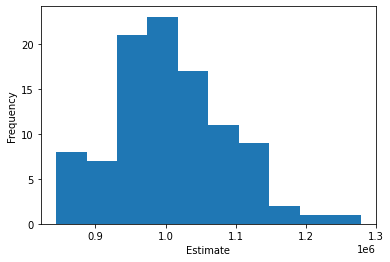

In [217]:
from scipy.stats import normaltest
from numpy.random import seed
from numpy.random import randn
alpha = 0.05
#data = df['tempo'].sample(n=10).array
data = []
for i in range(0,100):
    data.append(np.mean(df['streams'].sample(n=100)))
print(data)
plt.hist(data)
plt.xlabel("Estimate")
plt.ylabel("Frequency")

Text(0, 0.5, 'streams in millions')

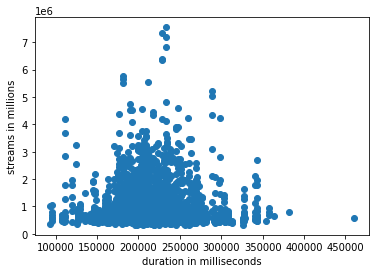

In [218]:
plt.scatter(df['duration_ms'],df['streams'])
plt.xlabel('duration in milliseconds')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

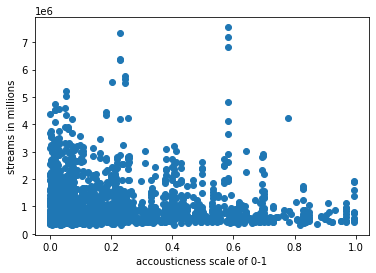

In [219]:
plt.scatter(df['acousticness'],df['streams'])
plt.xlabel('accousticness scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

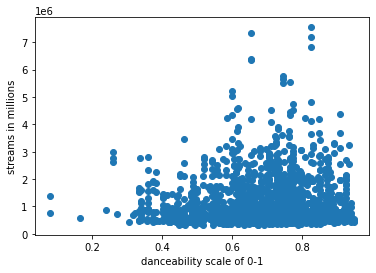

In [220]:
plt.scatter(df['danceability'],df['streams'])
plt.xlabel('danceability scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

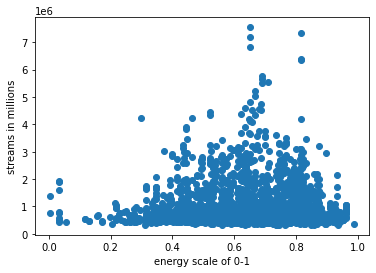

In [221]:
plt.scatter(df['energy'],df['streams'])
plt.xlabel('energy scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

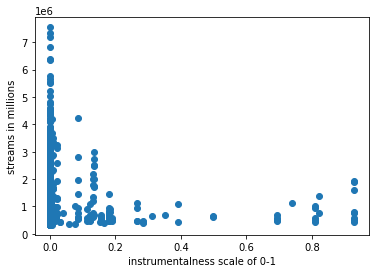

In [222]:
plt.scatter(df['instrumentalness'],df['streams'])
plt.xlabel('instrumentalness scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

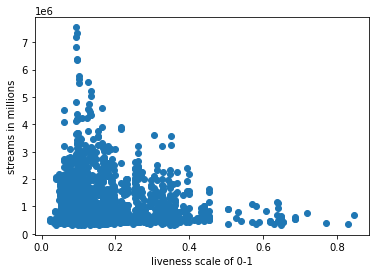

In [223]:
plt.scatter(df['liveness'],df['streams'])
plt.xlabel('liveness scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

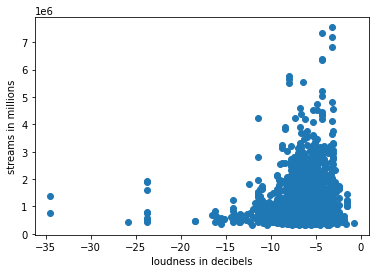

In [224]:
plt.scatter(df['loudness'],df['streams'])
plt.xlabel('loudness in decibels')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

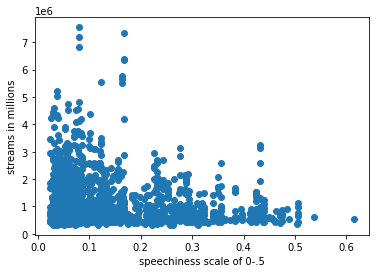

In [225]:
plt.scatter(df['speechiness'],df['streams'])
plt.xlabel('speechiness scale of 0-.5')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

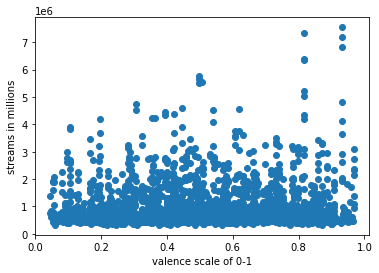

In [226]:
plt.scatter(df['valence'],df['streams'])
plt.xlabel('valence scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

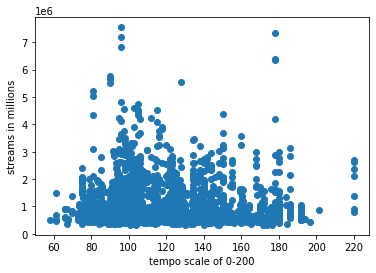

In [227]:
plt.scatter(df['tempo'],df['streams'])
plt.xlabel('tempo scale of 0-200')
plt.ylabel('streams in millions')

In [111]:
#violin plot of genre vs streams in millions
ax = sns.violinplot(x='genre', y='streams', data=df, palette='muted')


ValueError: Could not interpret input 'genre'

Text(0, 0.5, 'streams in millions')

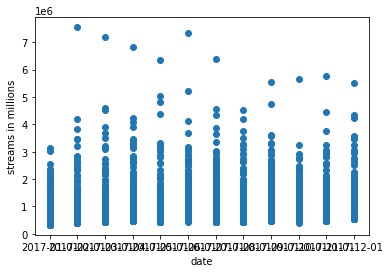

In [228]:
plt.scatter(df['date'],df['streams'])
plt.xlabel('date')
plt.ylabel('streams in millions')

Can we find any trends within these features for the top 5 songs from all the months we look at in our dataframe?

Going to standardize the number of streams to help us more easily visualize data. 

In [270]:
df['streams'] = df['streams'] / df['streams'].mean()

In [272]:
top5s = df.loc[df['position'] <= 5]
top5s.head(10)

index  position                                         track_name  \
0        1         1                                            Starboy   
1        2         2                                             Closer   
2        3         3                                    Let Me Love You   
3        4         4            Rockabye (feat. Sean Paul & Anne-Marie)   
4        5         5                                          One Dance   
200      1         1                                       Shape of You   
201      2         2                                              Paris   
202      3         3  I Don’t Wanna Live Forever (Fifty Shades Darke...   
203      4         4                 Despacito (Featuring Daddy Yankee)   
204      5         5                                 Castle on the Hill   

               artist   streams  \
0          The Weeknd  3.063383   
1    The Chainsmokers  2.946050   
2            DJ Snake  2.486741   
3        Clean Bandit  2.302310   
4               Drake  2.207821   
200        Ed Sheeran  7.375119   
201  The Chainsmokers  4.084960   
202              ZAYN  3.749851   
203        Luis Fonsi  3.380291   
204        Ed Sheeran  3.377087   

                                                   url        date  \
0    https://open.spotify.com/track/5aAx2yezTd8zXrk...  2017-01-01   
1    https://open.spotify.com/track/7BKLCZ1jbUBVqRi...  2017-01-01   
2    https://open.spotify.com/track/4pdPtRcBmOSQDlJ...  2017-01-01   
3    https://open.spotify.com/track/5knuzwU65gJK7IF...  2017-01-01   
4    https://open.spotify.com/track/1xznGGDReH1oQq0...  2017-01-01   
200  https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-02-01   
201  https://open.spotify.com/track/72jbDTw1piOOj77...  2017-02-01   
202  https://open.spotify.com/track/3NdDpSvN911VPGi...  2017-02-01   
203  https://open.spotify.com/track/4aWmUDTfIPGksMN...  2017-02-01   
204  https://open.spotify.com/track/6PCUP3dWmTjcTtX...  2017-02-01   

     duration_ms  acousticness  danceability  energy  instrumentalness  \
0       230453.0       0.14100         0.679   0.587          0.000006   
1       244960.0       0.41400         0.748   0.524          0.000000   
2       256733.0       0.23500         0.656   0.578          0.000000   
3       251088.0       0.40600         0.720   0.763          0.000000   
4       173987.0       0.00776         0.792   0.625          0.001800   
200     233713.0       0.58100         0.825   0.652          0.000000   
201     111020.0       0.07250         0.849   0.648          0.005920   
202     245653.0       0.05860         0.732   0.445          0.000017   
203          NaN           NaN           NaN     NaN               NaN   
204     261154.0       0.02320         0.461   0.834          0.000011   

     liveness  loudness  speechiness  valence    tempo  
0      0.1370    -7.015       0.2760    0.486  186.003  
1      0.1110    -5.599       0.0338    0.661   95.010  
2      0.1180    -8.970       0.0922    0.556   94.514  
3      0.1800    -4.068       0.0523    0.742  101.965  
4      0.3290    -5.609       0.0536    0.370  103.967  
200    0.0931    -3.183       0.0802    0.931   95.977  
201    0.0984    -6.188       0.0832    0.196  106.075  
202    0.2150    -8.403       0.0529    0.106  117.967  
203       NaN       NaN          NaN      NaN      NaN  
204    0.1400    -4.868       0.0989    0.471  135.007

We're going to try to take a look at the same comparisons we made in the graphs above, but only for the top 10 tracks for the 1st of January. These tracks have the most streams compared to all the other songs from that day, so it could be valuable to see if there are any features that made them so successful. Going on only plot features where data appeared to be more spread out in previous plots.

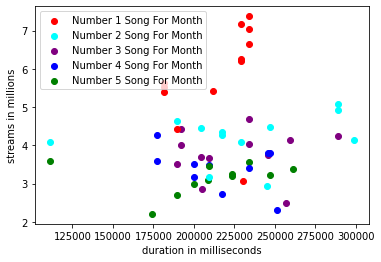

In [273]:
color_list = ['r', 'cyan', 'purple', 'b', 'green']

i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['duration_ms'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('duration in milliseconds')
plt.ylabel('streams in millions')
plt.legend(['Number 1 Song For Month', 'Number 2 Song For Month', 'Number 3 Song For Month', 'Number 4 Song For Month', 'Number 5 Song For Month'])


This graph Shows how the duration of a song in milliseconds compares to the number of streams that song received, and we're only using the first 10 pieces of data from our dataframe. This shows us that the songs with the most streams from this set of data are songs which are > 240000 ms, or 4 minutes. This is surprising, because the average song is usually around 3 minutes and 30 seconds or less.

Text(0, 0.5, 'streams in millions')

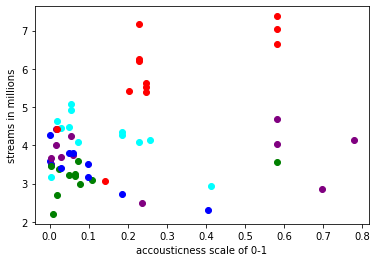

In [280]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['acousticness'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('accousticness scale of 0-1')
plt.ylabel('streams in millions')
#plt.legend(['Number 1 Song For Month', 'Number 2 Song For Month', 'Number 3 Song For Month', 'Number 4 Song For Month', 'Number 5 Song For Month'])

This graph displays a confidence score for how likely it is that a song is acoustic (with a value of 1 being very likely that the song is acoustic) compared to the number of streams the song has. All of the confidence scores are less than .5, which indicates most of these songs are probably not acoustic

Text(0, 0.5, 'streams in millions')

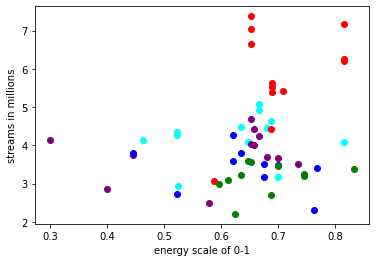

In [281]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['energy'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('energy scale of 0-1')
plt.ylabel('streams in millions')
#plt.legend(['Number 1 Song For Month', 'Number 2 Song For Month', 'Number 3 Song For Month', 'Number 4 Song For Month', 'Number 5 Song For Month'])

This graph shows how the "energy" of a song, or generally how noisy and fast the song is, compares to the number of streams for the top 10 songs on the 1st of January. Here, we see that the songs with the most streams are around or above .6 on the energy scale (a higher score means the song is higher energy)

Text(0, 0.5, 'streams in millions')

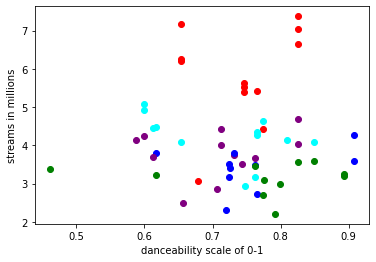

In [282]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['danceability'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('danceability scale of 0-1')
plt.ylabel('streams in millions')
#plt.legend(['Number 1 Song For Month', 'Number 2 Song For Month', 'Number 3 Song For Month', 'Number 4 Song For Month', 'Number 5 Song For Month'])

This graph shows how "danceable" a song is using a value provided to us by the Spotify API comapred to the number of streams that song got. Danceability is measured as a value from 0 to 1, where 1 is most danceable. This graph appears to be similar to the graph describing, so they may have been determined using similar characteristisc (i.e. both are measuring how upbeat or fast a song is)

Text(0, 0.5, 'streams in millions')

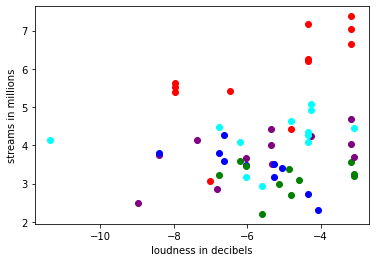

In [283]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['loudness'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('loudness in decibels')
plt.ylabel('streams in millions')
#plt.legend(['Number 1 Song For Month', 'Number 2 Song For Month', 'Number 3 Song For Month', 'Number 4 Song For Month', 'Number 5 Song For Month'])

This graph describes the average volume of each track in our top 5s data set compared to the number of streams each song had. It appears to trend similarly to the last two graphs, indicating that the volume of a track may be correlated with how danceable or energetic a song is.

Text(0, 0.5, 'streams in millions')

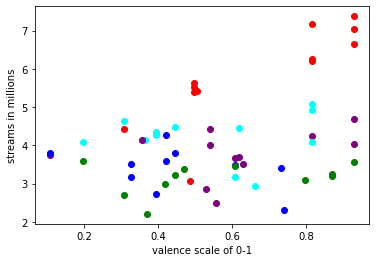

In [305]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['valence'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('valence scale of 0-1')
plt.ylabel('streams in millions')
#plt.legend(['Number 1 Song For Month', 'Number 2 Song For Month', 'Number 3 Song For Month', 'Number 4 Song For Month', 'Number 5 Song For Month'])

This graph describes the "valence" of a song compared to the # of streams it got. Valence is described as the "positivity" of a song where "Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)," according to the Spotify API reference. The reference does not describe how this value is determined, but our data seems to show there may be a correlation between valence and the number of streams a song is getting in the set of number 1 songs. However, this graph does not take into account the other features for the songs. It may be worth trying to consider songs where features except for this one are held to a constant, so that we can consider if there is a correlation between this value and the number of streams.

Text(0, 0.5, 'streams in millions')

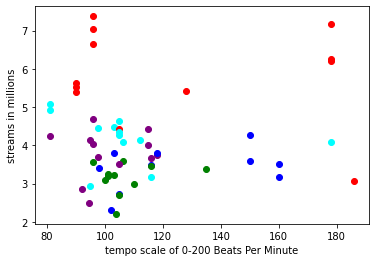

In [285]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['tempo'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('tempo scale of 0-200 Beats Per Minute')
plt.ylabel('streams in millions')
#plt.legend(['Number 1 Song For Month', 'Number 2 Song For Month', 'Number 3 Song For Month', 'Number 4 Song For Month', 'Number 5 Song For Month'])

This graph describes the tempo of a song comapred to the number of streams that song has. Given our dataset, it is unclear whether there is a correlation between the tempo of a song and the number of streams it gets.

There appeared to be a potential relationship between valence and the number of streams a song was getting, so it might be interesting to look at what the different features are like for songs with a valence of around .4 or higher

In [336]:
highValenceTopTracks = top5s.loc[top5s['valence'] > .4]
highValenceTopTracks.sort_values('streams', ascending=False).head(10)

index  position                track_name        artist   streams  \
200       1         1              Shape of You    Ed Sheeran  7.375119   
1000      1         1         Despacito - Remix    Luis Fonsi  7.163332   
400       1         1              Shape of You    Ed Sheeran  7.035225   
600       1         1              Shape of You    Ed Sheeran  6.658476   
1200      1         1         Despacito - Remix    Luis Fonsi  6.251114   
800       1         1         Despacito - Remix    Luis Fonsi  6.214192   
2000      1         1                  rockstar   Post Malone  5.623007   
1800      1         1                  rockstar   Post Malone  5.519344   
1600      1         1  Look What You Made Me Do  Taylor Swift  5.420143   
2200      1         1                  rockstar   Post Malone  5.401325   

                                                    url        date  \
200   https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-02-01   
1000  https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-06-01   
400   https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-03-01   
600   https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-04-01   
1200  https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-07-01   
800   https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-05-01   
2000  https://open.spotify.com/track/7wGoVu4Dady5GV0...  2017-11-01   
1800  https://open.spotify.com/track/1OmcAT5Y8eg5bUP...  2017-10-01   
1600  https://open.spotify.com/track/6uFsE1JgZ20EXyU...  2017-09-01   
2200  https://open.spotify.com/track/7wGoVu4Dady5GV0...  2017-12-01   

      duration_ms  acousticness  danceability  energy  instrumentalness  \
200      233713.0         0.581         0.825   0.652          0.000000   
1000     228827.0         0.228         0.653   0.816          0.000000   
400      233713.0         0.581         0.825   0.652          0.000000   
600      233713.0         0.581         0.825   0.652          0.000000   
1200     228827.0         0.228         0.653   0.816          0.000000   
800      228827.0         0.228         0.653   0.816          0.000000   
2000     181733.0         0.247         0.746   0.690          0.000000   
1800     181733.0         0.247         0.746   0.690          0.000000   
1600     211853.0         0.204         0.766   0.709          0.000014   
2200     181733.0         0.247         0.746   0.690          0.000000   

      liveness  loudness  speechiness  valence    tempo  
200     0.0931    -3.183       0.0802    0.931   95.977  
1000    0.0967    -4.353       0.1670    0.816  178.085  
400     0.0931    -3.183       0.0802    0.931   95.977  
600     0.0931    -3.183       0.0802    0.931   95.977  
1200    0.0967    -4.353       0.1670    0.816  178.085  
800     0.0967    -4.353       0.1670    0.816  178.085  
2000    0.1010    -7.956       0.1640    0.497   89.977  
1800    0.1010    -7.956       0.1640    0.497   89.977  
1600    0.1260    -6.471       0.1230    0.506  128.070  
2200    0.1010    -7.956       0.1640    0.497   89.977

We have duplicate pieces of data, so lets remove the duplicates for this test. We're going to try to keep the versions of the song that have the most streams

In [337]:
highValenceTopTracks = highValenceTopTracks.sort_values('streams', ascending=False).drop_duplicates(['artist', 'duration_ms', 'acousticness', 'danceability', 'energy'], keep='first') # Keeping the last seen version of each song, as that will probably hold it's total streams more accurately
highValenceTopTracks.sort_values('streams', ascending=False).head(10)

index  position                                     track_name  \
200       1         1                                   Shape of You   
1000      1         1                              Despacito - Remix   
2000      1         1                                       rockstar   
1600      1         1                       Look What You Made Me Do   
1001      2         2                                    I'm the One   
401       2         2                       Something Just Like This   
1201      2         2  Wild Thoughts (feat. Rihanna & Bryson Tiller)   
402       3         3                It Ain't Me (with Selena Gomez)   
803       4         4                                        HUMBLE.   
2002      3         3                                      New Rules   

                artist   streams  \
200         Ed Sheeran  7.375119   
1000        Luis Fonsi  7.163332   
2000       Post Malone  5.623007   
1600      Taylor Swift  5.420143   
1001         DJ Khaled  5.088986   
401   The Chainsmokers  4.476229   
1201         DJ Khaled  4.453111   
402               Kygo  4.425354   
803     Kendrick Lamar  4.271162   
2002          Dua Lipa  3.671914   

                                                    url        date  \
200   https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-02-01   
1000  https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-06-01   
2000  https://open.spotify.com/track/7wGoVu4Dady5GV0...  2017-11-01   
1600  https://open.spotify.com/track/6uFsE1JgZ20EXyU...  2017-09-01   
1001  https://open.spotify.com/track/72Q0FQQo32KJloi...  2017-06-01   
401   https://open.spotify.com/track/6RUKPb4LETWmmr3...  2017-03-01   
1201  https://open.spotify.com/track/1OAh8uOEOvTDqkK...  2017-07-01   
402   https://open.spotify.com/track/3eR23VReFzcdmS7...  2017-03-01   
803   https://open.spotify.com/track/7KXjTSCq5nL1LoY...  2017-05-01   
2002  https://open.spotify.com/track/2ekn2ttSfGqwhha...  2017-11-01   

      duration_ms  acousticness  danceability  energy  instrumentalness  \
200      233713.0      0.581000         0.825   0.652          0.000000   
1000     228827.0      0.228000         0.653   0.816          0.000000   
2000     181733.0      0.247000         0.746   0.690          0.000000   
1600     211853.0      0.204000         0.766   0.709          0.000014   
1001     288877.0      0.053300         0.599   0.667          0.000000   
401      247160.0      0.049800         0.617   0.635          0.000014   
1201     204664.0      0.028700         0.613   0.681          0.000000   
402      192000.0      0.016100         0.713   0.658          0.000138   
803      177000.0      0.000282         0.908   0.621          0.000054   
2002     209320.0      0.002610         0.762   0.700          0.000016   

      liveness  loudness  speechiness  valence    tempo  
200     0.0931    -3.183       0.0802    0.931   95.977  
1000    0.0967    -4.353       0.1670    0.816  178.085  
2000    0.1010    -7.956       0.1640    0.497   89.977  
1600    0.1260    -6.471       0.1230    0.506  128.070  
1001    0.1340    -4.267       0.0367    0.817   80.984  
401     0.1640    -6.769       0.0317    0.446  103.019  
1201    0.1260    -3.089       0.0778    0.619   97.621  
402     0.0607    -5.362       0.0748    0.539  115.024  
803     0.0958    -6.638       0.1020    0.421  150.011  
2002    0.1530    -6.021       0.0694    0.608  116.073

In [338]:
highValenceTopTracks = highValenceTopTracks.sort_values('valence', ascending=False)
highValenceTopTracks.head()

index  position                                         track_name  \
200       1         1                                       Shape of You   
1604      5         5  Feels (feat. Pharrell Williams, Katy Perry & B...   
1001      2         2                                        I'm the One   
1000      1         1                                  Despacito - Remix   
1004      5         5                                          Attention   

             artist   streams  \
200      Ed Sheeran  7.375119   
1604  Calvin Harris  3.247859   
1001      DJ Khaled  5.088986   
1000     Luis Fonsi  7.163332   
1004   Charlie Puth  3.096933   

                                                    url        date  \
200   https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-02-01   
1604  https://open.spotify.com/track/5bcTCxgc7xVfSaM...  2017-09-01   
1001  https://open.spotify.com/track/72Q0FQQo32KJloi...  2017-06-01   
1000  https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-06-01   
1004  https://open.spotify.com/track/4iLqG9SeJSnt0cS...  2017-06-01   

      duration_ms  acousticness  danceability  energy  instrumentalness  \
200      233713.0        0.5810         0.825   0.652          0.000000   
1604     223413.0        0.0642         0.893   0.745          0.000000   
1001     288877.0        0.0533         0.599   0.667          0.000000   
1000     228827.0        0.2280         0.653   0.816          0.000000   
1004     208787.0        0.1090         0.775   0.613          0.000023   

      liveness  loudness  speechiness  valence    tempo  
200     0.0931    -3.183       0.0802    0.931   95.977  
1604    0.0943    -3.105       0.0571    0.872  101.018  
1001    0.1340    -4.267       0.0367    0.817   80.984  
1000    0.0967    -4.353       0.1670    0.816  178.085  
1004    0.1340    -4.586       0.0542    0.797  100.066

Text(0, 0.5, 'streams in millions')

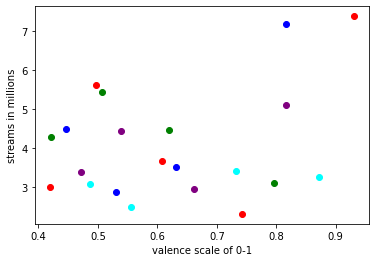

In [339]:
i = 0
for index, row in highValenceTopTracks.iterrows():
    plt.scatter(row['valence'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('valence scale of 0-1')
plt.ylabel('streams in millions')

No longer seeing the relationship we were seeing earlier between valence and number of streams. Maybe the relationship that leads to more streams is a combination of these features together. It might be worth trying to see if there is a relationship between streams and a combination of features like valence AND loudness or tempo AND danceability

Instead of considering high valence songs, let's looks at the top streamed songs for the 1st day of every month in the year of 2017

In [350]:
top500OverYear = df.sort_values('streams', ascending=False).drop_duplicates(['artist', 'duration_ms', 'acousticness', 'danceability', 'energy'], keep='first').head(500)
top500OverYear

index  position                                         track_name  \
200       1         1                                       Shape of You   
1000      1         1                                  Despacito - Remix   
2000      1         1                                           rockstar   
1600      1         1                           Look What You Made Me Do   
1001      2         2                                        I'm the One   
...     ...       ...                                                ...   
540     141       141                                           Reminder   
1768    169       169                                      Unforgettable   
2397    198       198                 New Freezer (feat. Kendrick Lamar)   
2398    199       199                                          All Night   
542     143       143  Helium - From "Fifty Shades Darker (Original M...   

            artist   streams  \
200     Ed Sheeran  7.375119   
1000    Luis Fonsi  7.163332   
2000   Post Malone  5.623007   
1600  Taylor Swift  5.420143   
1001     DJ Khaled  5.088986   
...            ...       ...   
540     The Weeknd  0.538596   
1768  Thomas Rhett  0.538164   
2397  Rich The Kid  0.537492   
2398    Steve Aoki  0.535413   
542            Sia  0.534684   

                                                    url        date  \
200   https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-02-01   
1000  https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-06-01   
2000  https://open.spotify.com/track/7wGoVu4Dady5GV0...  2017-11-01   
1600  https://open.spotify.com/track/6uFsE1JgZ20EXyU...  2017-09-01   
1001  https://open.spotify.com/track/72Q0FQQo32KJloi...  2017-06-01   
...                                                 ...         ...   
540   https://open.spotify.com/track/37F0uwRSrdzkBiu...  2017-03-01   
1768  https://open.spotify.com/track/0ZiRSqlSsDlY0Uy...  2017-09-01   
2397  https://open.spotify.com/track/4pYZLpX23Vx8rwD...  2017-12-01   
2398  https://open.spotify.com/track/5mAxA6Q1SIym6dP...  2017-12-01   
542   https://open.spotify.com/track/5fc6rQgAKiLutfU...  2017-03-01   

      duration_ms  acousticness  danceability  energy  instrumentalness  \
200      233713.0        0.5810         0.825   0.652          0.000000   
1000     228827.0        0.2280         0.653   0.816          0.000000   
2000     181733.0        0.2470         0.746   0.690          0.000000   
1600     211853.0        0.2040         0.766   0.709          0.000014   
1001     288877.0        0.0533         0.599   0.667          0.000000   
...           ...           ...           ...     ...               ...   
540      218880.0        0.1420         0.706   0.505          0.000000   
1768     233902.0        0.0293         0.726   0.769          0.010100   
2397     191938.0        0.0405         0.884   0.698          0.000000   
2398     197640.0        0.0041         0.538   0.804          0.000000   
542      252320.0        0.5510         0.420   0.396          0.000000   

      liveness  loudness  speechiness  valence    tempo  
200     0.0931    -3.183       0.0802    0.931   95.977  
1000    0.0967    -4.353       0.1670    0.816  178.085  
2000    0.1010    -7.956       0.1640    0.497   89.977  
1600    0.1260    -6.471       0.1230    0.506  128.070  
1001    0.1340    -4.267       0.0367    0.817   80.984  
...        ...       ...          ...      ...      ...  
540     0.1640    -6.923       0.1930    0.388  160.053  
1768    0.1040    -5.043       0.1230    0.733   97.985  
2397    0.1950    -9.101       0.3640    0.575  140.068  
2398    0.3300    -5.194       0.0358    0.507  144.992  
542     0.0708    -6.678       0.0296    0.132  136.849  

[500 rows x 17 columns]

Text(0.5, 0, 'streams in millions')

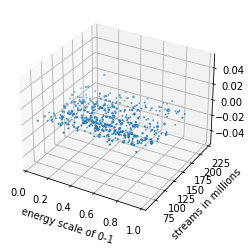

In [354]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.scatter(top500OverYear['valence'], top500OverYear['tempo'], top500OverYear['streams'])
plt.xlabel('energy scale of 0-1')
plt.ylabel('streams in millions')